In [48]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/UDKAZw-kz18Yj8P6icf_qw/survey-data-duplicates.csv"
df = pd.read_csv(file_path)

In [53]:
df.drop(df.columns[0], axis = 1, inplace = True)

In [55]:
#TASK 1 Count the number of duplicate rows in the dataset
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 497


In [57]:
# Display the first few duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows.head())

                                              MainBranch                 Age  \
46264                     I am a developer by profession     25-34 years old   
46774                     I am a developer by profession     18-24 years old   
46921                     I am a developer by profession     18-24 years old   
47073  I am not primarily a developer, but I write co...     25-34 years old   
47340                        I code primarily as a hobby  Under 18 years old   

                Employment                            RemoteWork   Check  \
46264  Employed, full-time                                Remote  Apples   
46774  Employed, full-time  Hybrid (some remote, some in-person)  Apples   
46921  Employed, full-time                             In-person  Apples   
47073  Employed, full-time                             In-person  Apples   
47340   Student, full-time                                   NaN  Apples   

                                        CodingActivities EdLev

In [59]:
# Analyze which columns have the same values in duplicates
duplicate_columns = df[df.duplicated()].nunique()
print("Unique values in duplicate rows by column:")
print(duplicate_columns)

# Analyze duplicates by specific columns (e.g., 'Country', 'Employment', 'DevType')
analysis_columns = ['Country', 'Employment', 'DevType']  # Ensure these columns exist
for col in analysis_columns:
    print(f"Distribution of duplicates in column '{col}':")
    print(df[df.duplicated()][col].value_counts())

Unique values in duplicate rows by column:
MainBranch              5
Age                     7
Employment             13
RemoteWork              3
Check                   1
                       ..
JobSatPoints_11         1
SurveyLength            3
SurveyEase              3
ConvertedCompYearly     0
JobSat                  0
Length: 113, dtype: int64
Distribution of duplicates in column 'Country':
Country
United States of America                                3
United Kingdom of Great Britain and Northern Ireland    3
Canada                                                  1
Norway                                                  1
Uzbekistan                                              1
Serbia                                                  1
Name: count, dtype: int64
Distribution of duplicates in column 'Employment':
Employment
Employed, full-time                                                         366
Student, full-time                                                       

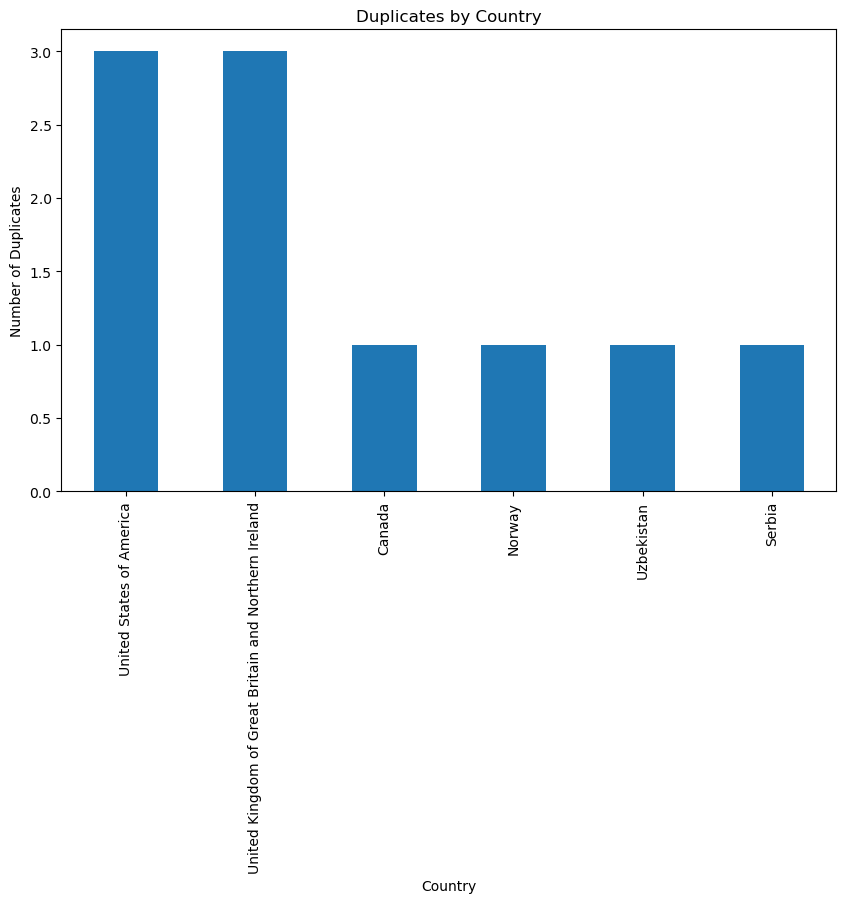

In [61]:
# Example: Distribution of duplicates by 'Country'
df_duplicates = df[df.duplicated()]
if 'Country' in df.columns:  # Check if 'Country' is still present
    country_counts = df_duplicates['Country'].value_counts()

    # Bar chart
    country_counts.plot(kind='bar', figsize=(10, 6), title='Duplicates by Country')
    plt.xlabel('Country')
    plt.ylabel('Number of Duplicates')
    plt.show()

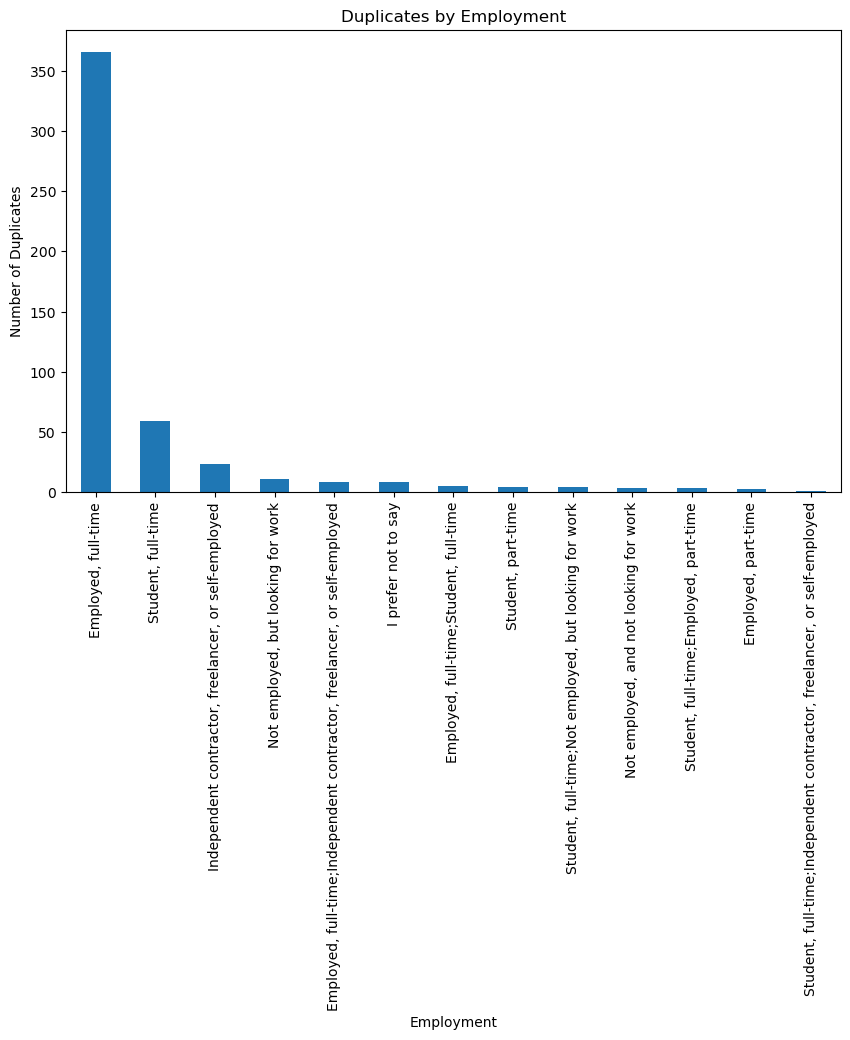

In [63]:
df_duplicates = df[df.duplicated()]
if 'Employment' in df.columns:  
    employment_counts = df_duplicates['Employment'].value_counts()

    # Bar chart
    employment_counts.plot(kind='bar', figsize=(10, 6), title='Duplicates by Employment')
    plt.xlabel('Employment')
    plt.ylabel('Number of Duplicates')
    plt.show()

In [65]:
# Removing duplicates based on specific columns
critical_columns = ['Country', 'Employment']  # Replace with columns still in the dataset
df_unique = df.drop_duplicates(subset=critical_columns)

# Display the new dataset
print("Dataset after removing duplicates based on critical columns:")
print(df_unique.head())

Dataset after removing duplicates based on critical columns:
                       MainBranch                 Age           Employment  \
0  I am a developer by profession  Under 18 years old  Employed, full-time   
1  I am a developer by profession     35-44 years old  Employed, full-time   
3           I am learning to code     18-24 years old   Student, full-time   
4  I am a developer by profession     18-24 years old   Student, full-time   
5     I code primarily as a hobby  Under 18 years old   Student, full-time   

  RemoteWork   Check                                   CodingActivities  \
0     Remote  Apples                                              Hobby   
1     Remote  Apples  Hobby;Contribute to open-source projects;Other...   
3        NaN  Apples                                                NaN   
4        NaN  Apples                                                NaN   
5        NaN  Apples                                                NaN   

                   